In [66]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [67]:
with open("./Dadca/results.json", "r") as file:
    result_file_1 = json.loads(file.read())
with open("./QLearning/results.json", "r") as file:
    result_file_2 = json.loads(file.read())
result_file = result_file_1 + result_file_2

In [68]:
import re
result_df = pd.json_normalize(result_file)
result_df.rename(columns=lambda c: re.sub(r'^simulation_results.', '', c), inplace=True)
result_df.rename(columns=lambda c: re.sub(r'^simulation_config.', '', c), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df

,completed_training_steps,controller,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.reward_function,controller_config.qtable_initialization_value,controller_config.qtable_format,model_file,...,campaign_config.testing_repetitions,campaign_config.concurrent_simulations,campaign_config.concurrent_testing,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.epsilons,controller.bins
0,100000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,4.json,...,5,True,True,3.0,0.3,0.313737,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN
1,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,77.json,...,5,True,True,3.0,0.3,0.299415,0.166400,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",NaN,NaN
2,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,77.json,...,5,True,True,3.0,0.3,0.300413,0.166664,"[0.15269634755821485, 0.164760900708867, 0.165...",NaN,NaN
3,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,86.json,...,5,True,True,3.0,0.3,0.292570,0.166400,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",NaN,NaN
4,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,86.json,...,5,True,True,3.0,0.3,0.285516,0.166400,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,300000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,78.json,...,5,True,True,13.0,1.3,1.274404,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN
9176,300000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,78.json,...,5,True,True,13.0,1.3,1.245026,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN
9177,300000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,78.json,...,5,True,True,13.0,1.3,1.262561,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN
9178,300000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,78.json,...,5,True,True,13.0,1.3,1.258678,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN


In [69]:
result_df.columns

Index(['completed_training_steps', 'controller',
       'controller_config.epsilon_start', 'controller_config.epsilon_end',
       'controller_config.learning_rate', 'controller_config.gamma',
       'controller_config.reward_function',
       'controller_config.qtable_initialization_value',
       'controller_config.qtable_format', 'model_file', 'state',
       'mission_size', 'num_agents', 'sensor_generation_frequency',
       'sensor_generation_probability', 'sensor_packet_lifecycle',
       'simulation_steps', 'training', 'step_by_step', 'plots', 'verbose',
       'repetitions', 'campaign_config.training_steps',
       'campaign_config.testing_steps',
       'campaign_config.live_testing_frequency',
       'campaign_config.testing_repetitions',
       'campaign_config.concurrent_simulations',
       'campaign_config.concurrent_testing', 'max_possible_throughput',
       'expected_throughput', 'avg_throughput', 'controller.avg_reward',
       'controller.cum_avg_rewards', 'controlle

In [70]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,completed_training_steps,controller,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.reward_function,controller_config.qtable_initialization_value,controller_config.qtable_format,...,campaign_config.testing_repetitions,campaign_config.concurrent_simulations,campaign_config.concurrent_testing,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.epsilons,controller.bins
0,0,100000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,5,True,True,3.0,0.3,0.313737,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN
1,1,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,5,True,True,3.0,0.3,0.299415,0.166400,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",NaN,NaN
2,2,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,5,True,True,3.0,0.3,0.300413,0.166664,"[0.15269634755821485, 0.164760900708867, 0.165...",NaN,NaN
3,3,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,5,True,True,3.0,0.3,0.292570,0.166400,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",NaN,NaN
4,4,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,5,True,True,3.0,0.3,0.285516,0.166400,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",NaN,NaN


In [71]:
import warnings
with warnings.catch_warnings():
    # Converting columns to numeric to improve visibility in graphs
    warnings.simplefilter("ignore")
    result_df['maximum_simulation_steps'] = pd.to_numeric(result_df['completed_training_steps'])
    result_df['mission_size'] = pd.to_numeric(result_df['mission_size'])
    result_df['num_agents'] = pd.to_numeric(result_df['num_agents'])
    result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

# Analysing Q Learning training performance

In [72]:
# Plot configurations
grid_row_column = 'mission_size'
grid_col_column = 'num_agents'
grid_hue_column = 'controller'

result_df

,campaign_id,completed_training_steps,controller,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.reward_function,controller_config.qtable_initialization_value,controller_config.qtable_format,...,campaign_config.concurrent_testing,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.epsilons,controller.bins,maximum_simulation_steps,score
0,0,100000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,3.0,0.3,0.313737,0.055500,"[0.0, 0.0158187134502924, 0.03972474737767091,...",NaN,NaN,100000,1.045792
1,1,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,3.0,0.3,0.299415,0.166400,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",NaN,NaN,1000000,0.998050
2,2,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,3.0,0.3,0.300413,0.166664,"[0.15269634755821485, 0.164760900708867, 0.165...",NaN,NaN,1000000,1.001377
3,3,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,3.0,0.3,0.292570,0.166400,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",NaN,NaN,1000000,0.975233
4,4,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,3.0,0.3,0.285516,0.166400,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",NaN,NaN,1000000,0.951719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,9175,300000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,13.0,1.3,1.274404,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,300000,0.980310
9176,9176,300000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,13.0,1.3,1.245026,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,300000,0.957712
9177,9177,300000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,13.0,1.3,1.262561,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,300000,0.971200
9178,9178,300000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,13.0,1.3,1.258678,0.024800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",NaN,NaN,300000,0.968214


In [89]:
q_learning_testing = result_df[~result_df['training']]

In [115]:
def grid_comparison_plot(df: pd.DataFrame, title: str, x: str, y: str):
    with sns.plotting_context("notebook", font_scale=1.3):
        grid = sns.FacetGrid(df, row=grid_row_column, col=grid_col_column, aspect=2)



        if grid_hue_column is not None:
            unique_hue_values = list(df[grid_hue_column].unique())
            grid.map_dataframe(sns.lineplot, x=x, y=y, hue=grid_hue_column, hue_order=unique_hue_values)
        else:
            grid.map_dataframe(sns.lineplot, x=x, y=y)

        grid.add_legend()

        grid.fig.subplots_adjust(top=0.8)
        grid.fig.suptitle(title, fontsize=20)

        plt.tight_layout()

        plt.show()

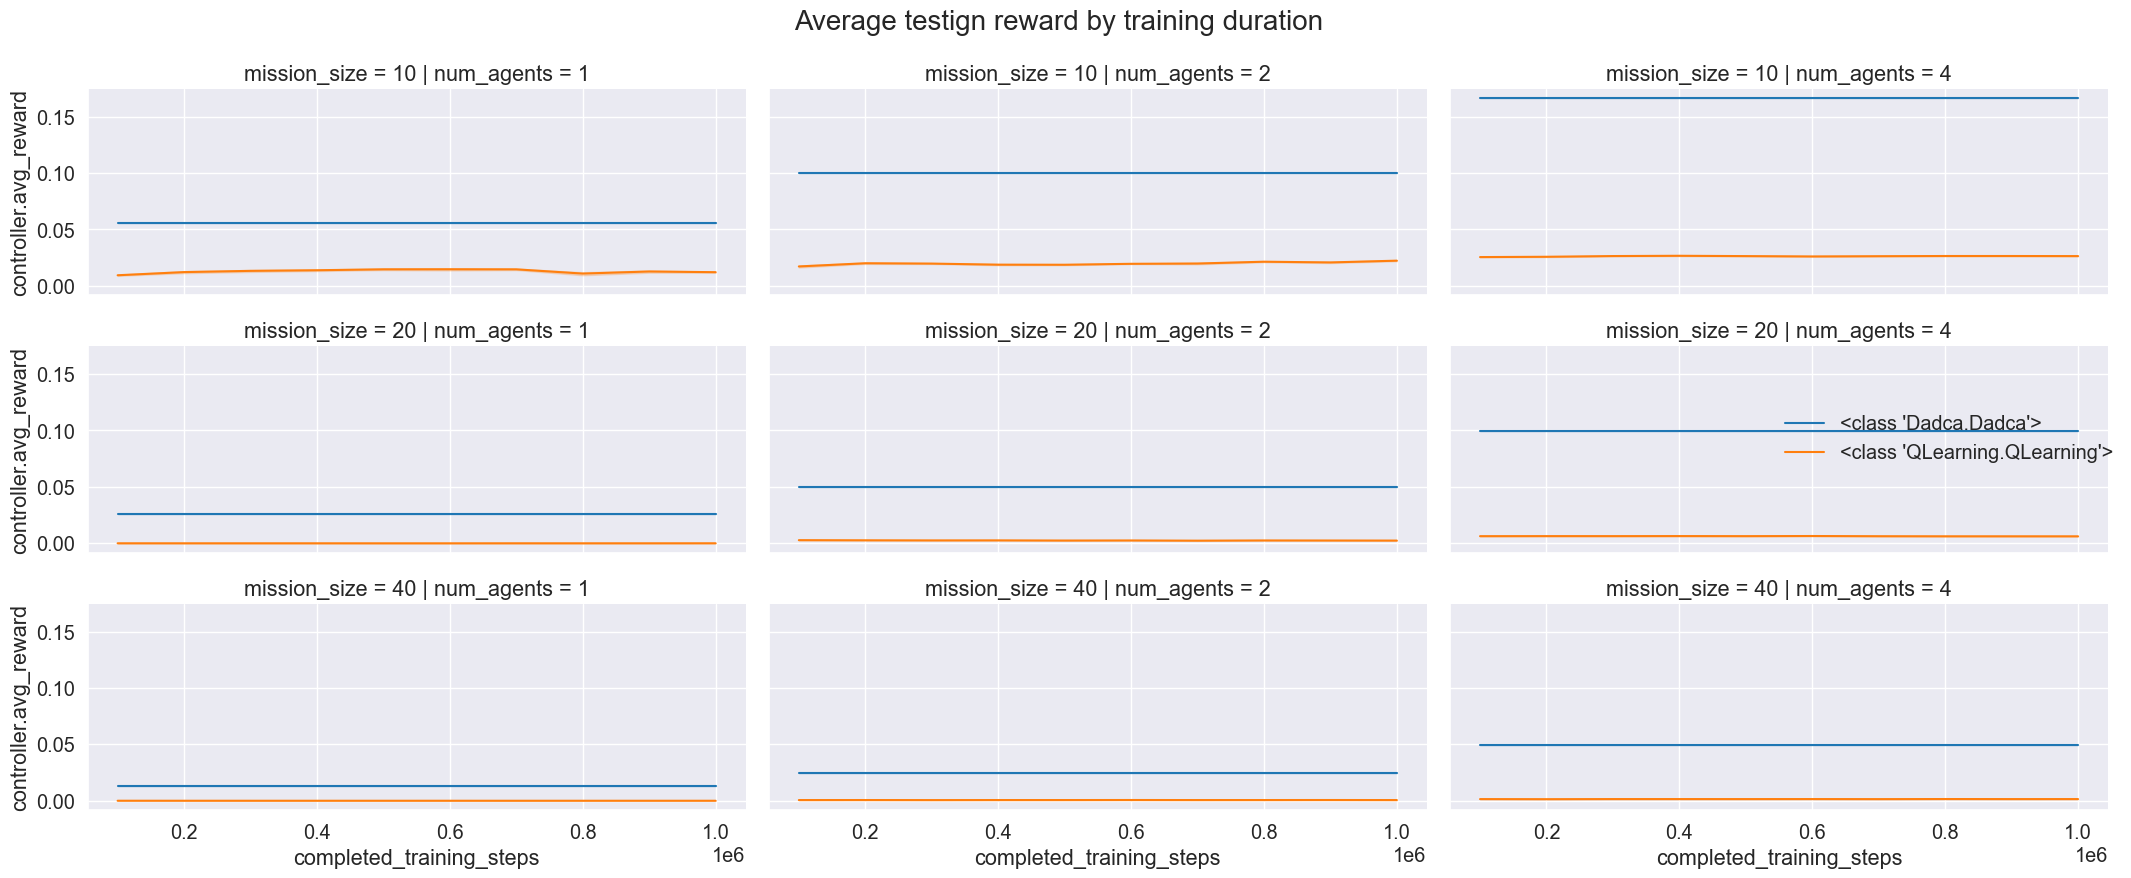

In [116]:
grid_comparison_plot(q_learning_testing, "Average testign reward by training duration", x='completed_training_steps', y='controller.avg_reward')

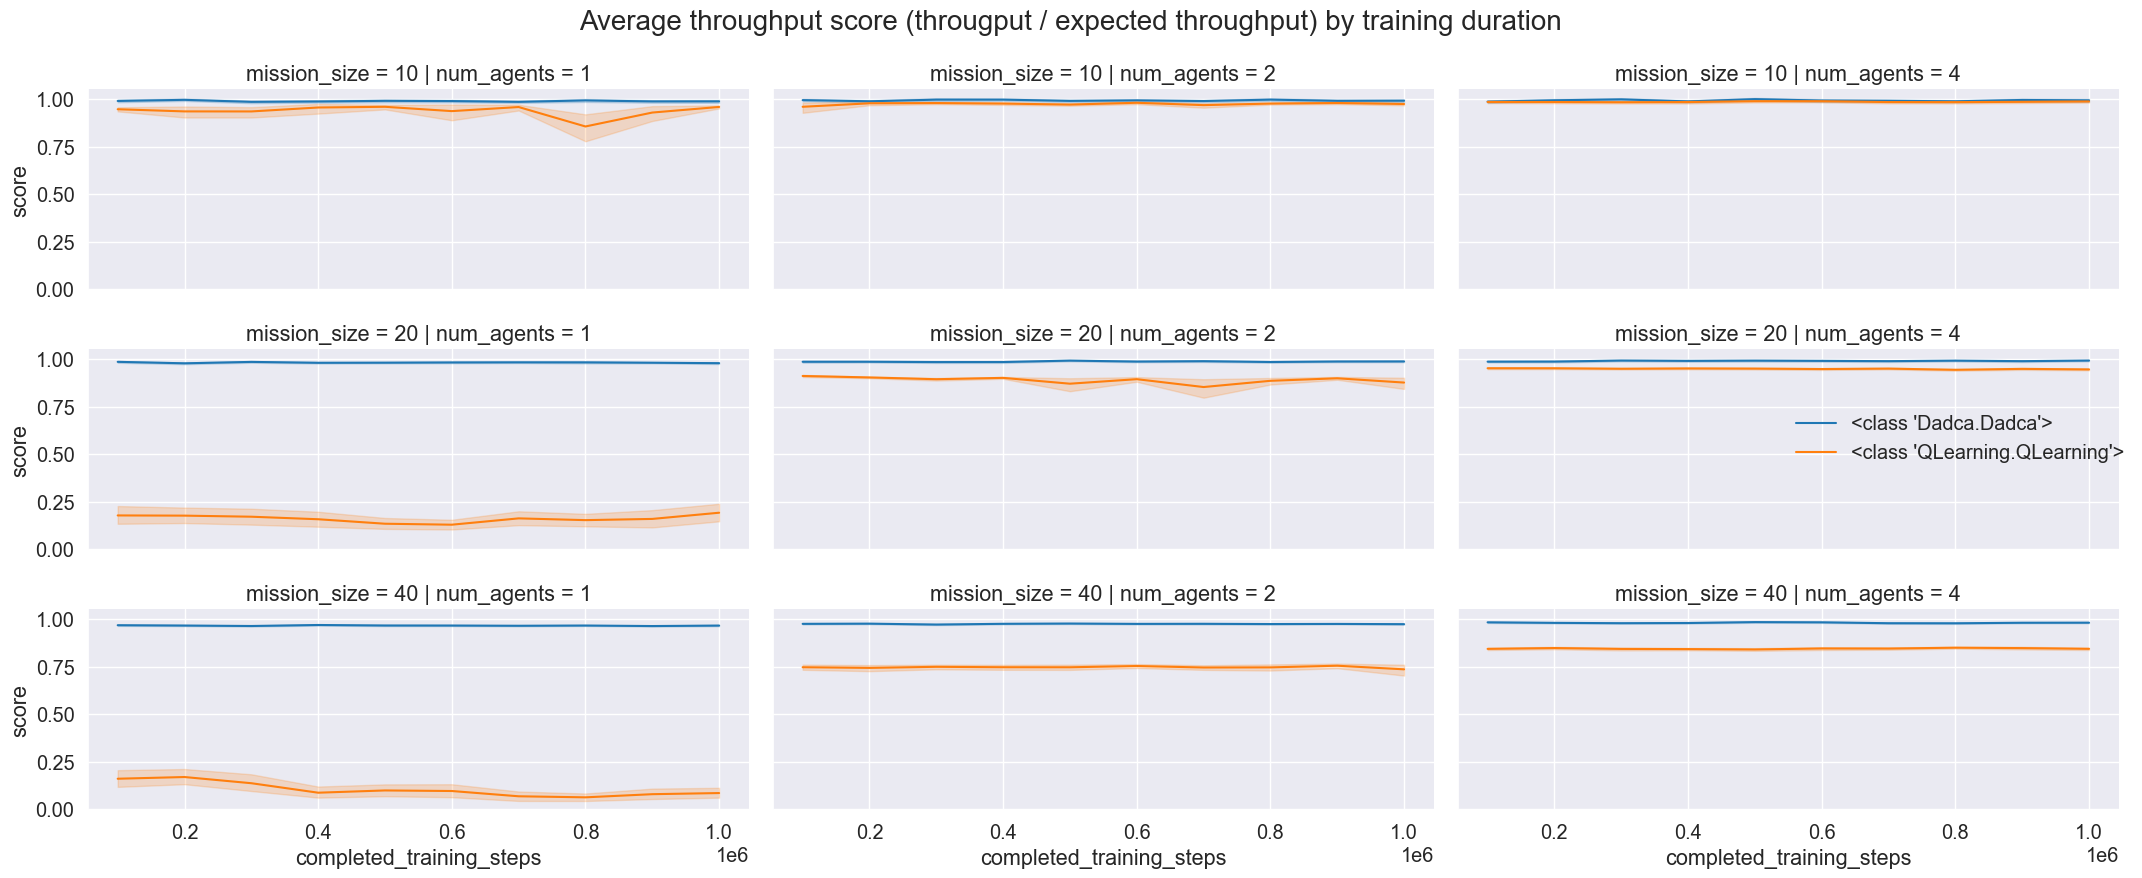

In [117]:
grid_comparison_plot(q_learning_testing, 'Average throughput score (througput / expected throughput) by training duration', x='completed_training_steps', y='score')

In [118]:
q_learning_training = result_df[result_df['training']]
q_learning_training

,campaign_id,completed_training_steps,controller,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.reward_function,controller_config.qtable_initialization_value,controller_config.qtable_format,...,campaign_config.concurrent_testing,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.epsilons,controller.bins,maximum_simulation_steps,score
2,2,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,3.0,0.3,0.300413,0.166664,"[0.15269634755821485, 0.164760900708867, 0.165...",NaN,NaN,1000000,1.001377
8,8,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,3.0,0.3,0.299804,0.166664,"[0.15269634755821485, 0.164760900708867, 0.165...",NaN,NaN,1000000,0.999347
36,36,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,3.0,0.3,0.299588,0.099998,"[0.09243186256785668, 0.09899548680462421, 0.0...",NaN,NaN,1000000,0.998625
43,43,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,3.0,0.3,0.298640,0.055555,"[0.05278416232699952, 0.055227586191262217, 0....",NaN,NaN,1000000,0.995465
48,48,1000000,<class 'Dadca.Dadca'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,True,3.0,0.3,0.300527,0.166664,"[0.15269634755821485, 0.164760900708867, 0.165...",NaN,NaN,1000000,1.001755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,9012,1000000,<class 'QLearning.QLearning'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,False,13.0,1.3,1.229026,0.000087,"[0.0, 0.0004835414753544856, 0.000405381786348...","[0.996550619520701, 0.989690413309793, 0.98287...","[0.0, 1001.001001001001, 2002.002002002002, 30...",1000000,0.945405
9086,9086,1000000,<class 'QLearning.QLearning'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,False,13.0,1.3,1.266077,0.000091,"[0.0, 5.920411029012047e-05, 0.000405381786348...","[0.996550619520701, 0.989690413309793, 0.98287...","[0.0, 1001.001001001001, 2002.002002002002, 30...",1000000,0.973906
9107,9107,1000000,<class 'QLearning.QLearning'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,False,13.0,1.3,1.293491,0.000536,"[0.0, 7.308951329336615e-05, 0.000526774895290...","[0.996550619520701, 0.989690413309793, 0.98287...","[0.0, 1001.001001001001, 2002.002002002002, 30...",1000000,0.994993
9169,9169,1000000,<class 'QLearning.QLearning'>,1.0,0.001,0.9,0.99,unique_packets,0,<class 'QLearning.SparseQTable'>,...,False,13.0,1.3,1.294438,0.001550,"[0.0, 0.0011492585675107593, 0.001471939022045...","[0.996550619520701, 0.989690413309793, 0.98287...","[0.0, 1001.001001001001, 2002.002002002002, 30...",1000000,0.995721


In [78]:
q_learning_training_exploded = q_learning_training.explode(['controller.cum_avg_rewards', 'controller.losses', 'controller.epsilons', 'controller.step_bins'])
q_learning_training_exploded.reset_index(names='step', inplace=True)
q_learning_training_exploded

KeyError: 'controller.losses'

In [ ]:
grid_comparison_plot(q_learning_training_exploded, 'Cum. Avg. Reward by training step', x='controller.step_bins', y='controller.cum_avg_rewards')

In [ ]:
grid_comparison_plot(q_learning_training_exploded, 'Loss by training step', x='controller.step_bins', y='controller.losses')

In [ ]:
grid_comparison_plot(q_learning_training_exploded, 'Epsilon by training step', x='controller.step_bins', y='controller.epsilons')